In [1]:
# import some useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from scipy.interpolate import make_interp_spline
% matplotlib inline
plt.style.use('seaborn-whitegrid')

token = open("pk.eyJ1IjoieXV0b25nMDYyOSIsImEiOiJjbG9jM2IwNm0weWxqMmlubjB4b2V2ZWF5In0.DvGhBLaLcFQpyalSaXaYiw").read()

px.set_mapbox_access_token('pk.eyJ1IjoieXV0b25nMDYyOSIsImEiOiJjbG9jM2IwNm0weWxqMmlubjB4b2V2ZWF5In0.DvGhBLaLcFQpyalSaXaYiw')

UsageError: Line magic function `%` not found.


In [2]:
# load dataset
df = pd.read_csv('./final_data.csv')

# list first few rows
df.head()
print(len(df))

97856


In [4]:
# initial data exploration
df.describe()
print(df.shape)

(97856, 12)


In [4]:
df = df[df.fare_amount>=0]

In [5]:
# set the color set
colors = {
    'primary-100': '#1F3A5F',
    'primary-200': '#4d648d',
    'primary-300': '#acc2ef',
    'accent-100': '#3D5A80',
    'accent-200': '#cee8ff',
    'text-100': '#FFFFFF',
    'text-200': '#e0e0e0',
    'bg-100': '#0F1C2E',
    'bg-200': '#1f2b3e',
    'bg-300': '#374357'
}

In [ ]:
# plot the histgram for fare
dpi = 100
width_inch = 1000 / dpi
height_inch = 1000 / dpi
filtered_fares_60 = df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= 60)]
plt.figure(figsize=(width_inch, height_inch))  # Square figure
n, bins, patches = plt.hist(filtered_fares_60['fare_amount'], bins=30, edgecolor=colors['primary-100'])

# Set vivid colors for each bin
for i in range(len(patches)):
    if i % 2 == 0:
        patches[i].set_facecolor(colors['accent-200'])  # Using a lighter color for more contrast
    else:
        patches[i].set_facecolor(colors['primary-300'])  # Using a different contrasting color

# Set plot background, grid, title, and labels colors
plt.gca().set_facecolor(colors['bg-100'])
plt.gcf().set_facecolor(colors['bg-200'])
title_fontsize = 50
xlabel_fontsize = 30
ylabel_fontsize = 30
plt.title('Distribution of Taxi Fares in New York (0-60 USD)', color=colors['text-100'])
plt.xlabel('Fare Amount (USD)', color=colors['text-100'])
plt.ylabel('Number of Rides', color=colors['text-100'])
plt.grid(axis='y', alpha=0.75, color=colors['bg-300'])
plt.tick_params(axis='x', colors=colors['text-100'])
plt.tick_params(axis='y', colors=colors['text-100'])

# Display the plot
plt.savefig('saved_figure.png', dpi=dpi)
plt.show()

In [ ]:
m = folium.Map(location=[40.7128, -74.0060], tiles='CartoDB dark_matter', zoom_start=10)

for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['pickup_latitude'], row['pickup_longitude']],
        radius=2,
        color=colors['accent-200'],  # Use custom colours
        fill=True,
        fill_color=colors['accent-200']
    ).add_to(m)

m

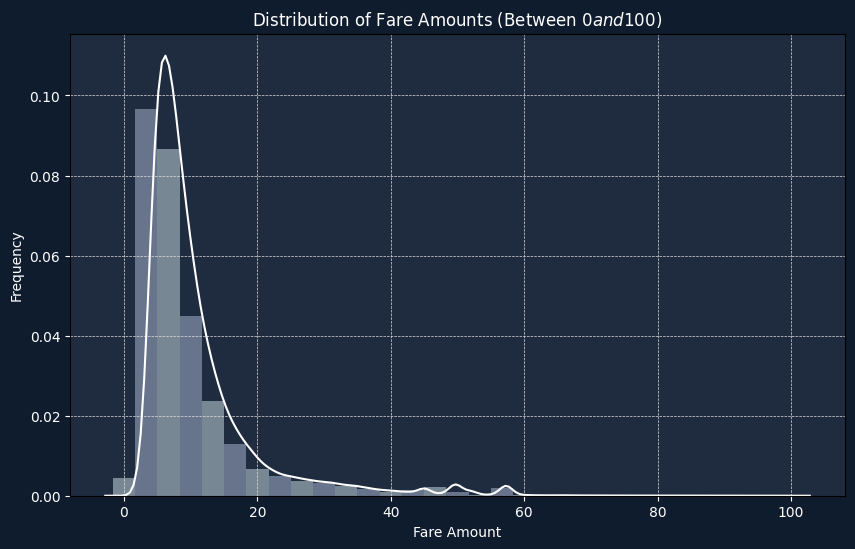

In [7]:
# Filter data to include only fares from $0 to $100
filtered_data_positive = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 100)]

# set background
plt.figure(figsize=(10, 6), facecolor=colors['bg-100'])

filtered_counts_positive, filtered_bins_positive = np.histogram(filtered_data_positive['fare_amount'], bins=30, density=True)

deeper_accent_200 = sns.dark_palette(colors['accent-200'], n_colors=3, reverse=True)[1]
deeper_primary_300 = sns.dark_palette(colors['primary-300'], n_colors=3, reverse=True)[1]

for i in range(len(filtered_counts_positive)):
    plt.bar(filtered_bins_positive[i], filtered_counts_positive[i], width=filtered_bins_positive[i+1]-filtered_bins_positive[i], 
            color=deeper_accent_200 if i % 2 == 0 else deeper_primary_300)

# Add KDE curve
sns.kdeplot(filtered_data_positive['fare_amount'], color=colors['text-100'], ax=plt.gca())

# set title
plt.title('Distribution of Fare Amounts (Between $0 and $100)', color=colors['text-100'])
plt.xlabel('Fare Amount', color=colors['text-100'])
plt.ylabel('Frequency', color=colors['text-100'])
plt.tick_params(colors=colors['text-100'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=colors['text-200'])
plt.gca().set_facecolor(colors['bg-200'])

plt.savefig('../frontend/resources/images/fare_distribution.png')

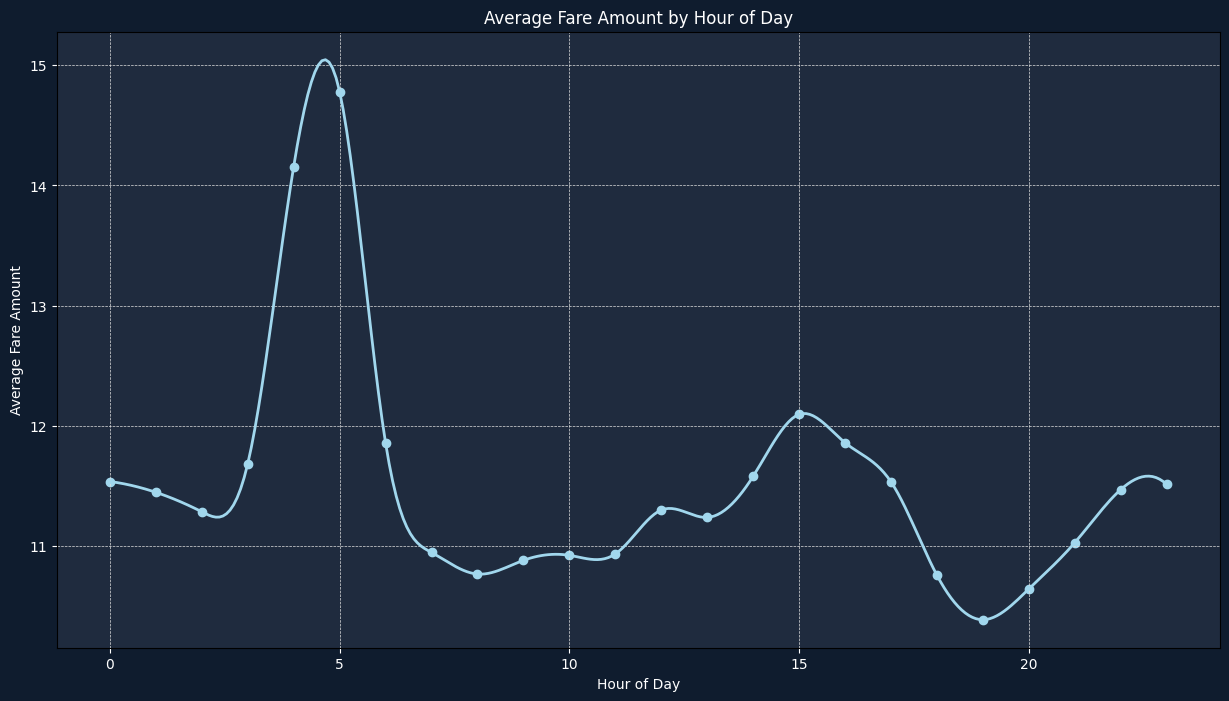

In [13]:
# Filter data to include only fares between $0 and $100 and exclude fares less than or equal to 0
filtered_data_by_hour = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 100)]

# Calculation of average fare per hour
hourly_average_fare = filtered_data_by_hour.groupby('Hour')['fare_amount'].mean().reset_index()

# Defining the colour scheme
color_palette = {
    'primary-100': '#1F3A5F',
    'primary-200': '#4d648d',
    'primary-300': '#acc2ef',
    'accent-100': '#3D5A80',
    'accent-200': '#cee8ff',
    'text-100': '#FFFFFF',
    'text-200': '#e0e0e0',
    'bg-100': '#0F1C2E',
    'bg-200': '#1f2b3e',
    'bg-300': '#374357'
}
light_blue_color = sns.light_palette("skyblue", n_colors=5)[-2]

x = hourly_average_fare['Hour']
y = hourly_average_fare['fare_amount']

x_new = np.linspace(x.min(), x.max(), 300) 
spl = make_interp_spline(x, y, k=3)  
y_smooth = spl(x_new)

plt.figure(figsize=(15, 8), facecolor=color_palette['bg-100'])
plt.plot(x_new, y_smooth, color=light_blue_color, lw=2)
plt.scatter(x, y, color=light_blue_color) 
plt.title('Average Fare Amount by Hour of Day', color=color_palette['text-100'])
plt.xlabel('Hour of Day', color=color_palette['text-100'])
plt.ylabel('Average Fare Amount', color=color_palette['text-100'])
plt.tick_params(colors=color_palette['text-100'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=color_palette['text-200'])
plt.gca().set_facecolor(color_palette['bg-200'])

# plt.show()
plt.savefig('../frontend/resources/images/average_fare_by_hour.png')

C:\Users\33452\AppData\Local\Temp\ipykernel_45444\1500088144.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='fare_amount', data=filtered_data, palette=light_blue_to_gray_palette)
C:\Users\33452\AppData\Local\Temp\ipykernel_45444\1500088144.py:22: UserWarning: The palette list has more values (36) than needed (24), which may not be intended.
  sns.boxplot(x='Hour', y='fare_amount', data=filtered_data, palette=light_blue_to_gray_palette)


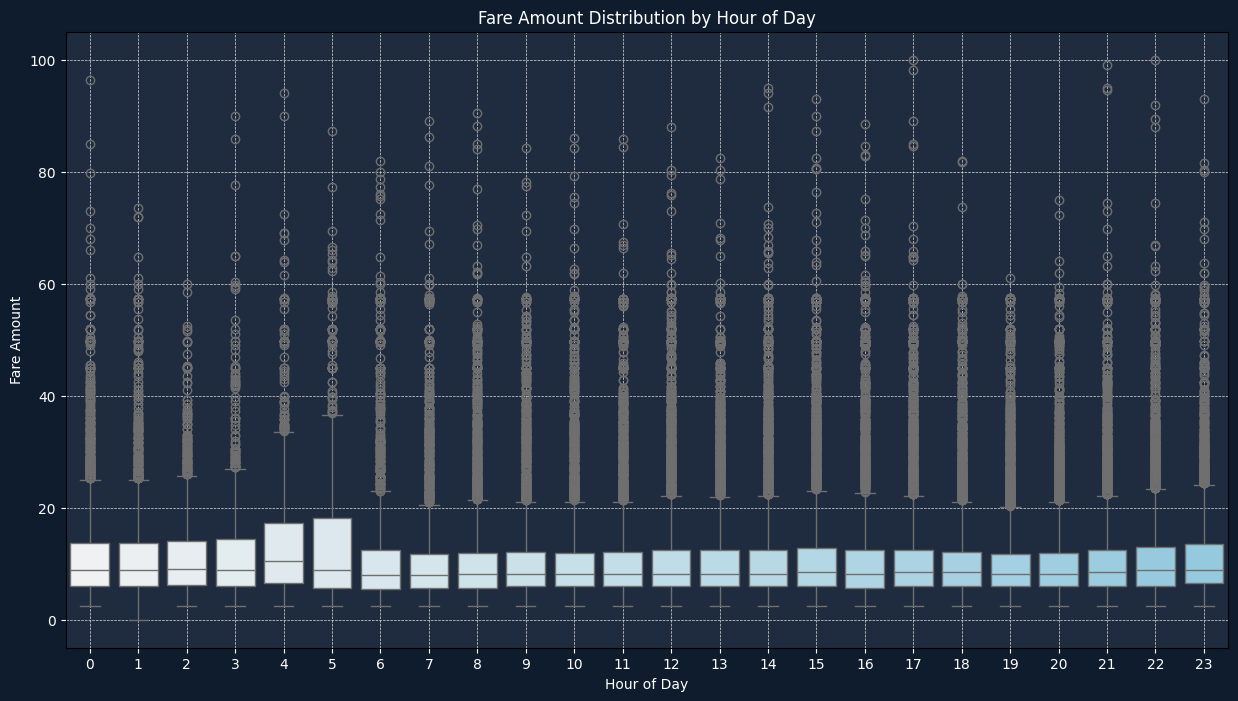

In [15]:
filtered_data = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 100)]

color_palette = {
    'primary-100': '#1F3A5F',
    'primary-200': '#4d648d',
    'primary-300': '#acc2ef',
    'accent-100': '#3D5A80',
    'accent-200': '#cee8ff',
    'text-100': '#FFFFFF',
    'text-200': '#e0e0e0',
    'bg-100': '#0F1C2E',
    'bg-200': '#1f2b3e',
    'bg-300': '#374357'
}
light_blue_to_gray_palette = sns.light_palette("skyblue", n_colors=24) + sns.color_palette("Greys", n_colors=24)[-12:]

plt.figure(figsize=(15, 8), facecolor=color_palette['bg-100'])
sns.boxplot(x='Hour', y='fare_amount', data=filtered_data, palette=light_blue_to_gray_palette)
plt.title('Fare Amount Distribution by Hour of Day', color=color_palette['text-100'])
plt.xlabel('Hour of Day', color=color_palette['text-100'])
plt.ylabel('Fare Amount', color=color_palette['text-100'])
plt.tick_params(colors=color_palette['text-100'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=color_palette['text-200'])
plt.gca().set_facecolor(color_palette['bg-200'])

# plt.show()
plt.savefig('../frontend/resources/images/fare_by_hour.png')